## Linear regression extended

- Learning rate
- Feature scaling
- Feature engineering
- Polynomial regression

In [2]:
import sys
import os
import json
import numpy as np
import importlib
import matplotlib.pyplot as plt
from fontTools.misc.bezierTools import epsilon
import pandas as pd

module_path = os.path.abspath(os.path.join('..', 'jantools'))

if module_path not in sys.path:
    sys.path.append(module_path)

import linear_regression_extended as lnrgmv

#### Load training data set

In [3]:
file_path = "../data/linear_regression_singlevar.json"

with open(file_path, "r") as f:
    data = json.load(f)

# Convert to NumPy arrays
x = np.array([item["x"] for item in data]).reshape(-1, 1)  # shape (n_samples, 1)
y = np.array([item["y"] for item in data])                  # shape (n_samples,)

#### Learning rate

- **high alpha**: perfect data fit and cost reduction + the risk of jumping around the optimal w/b parameters
- **low alpha**: low level of data fit due to small number of iteration steps + slow cost reduction

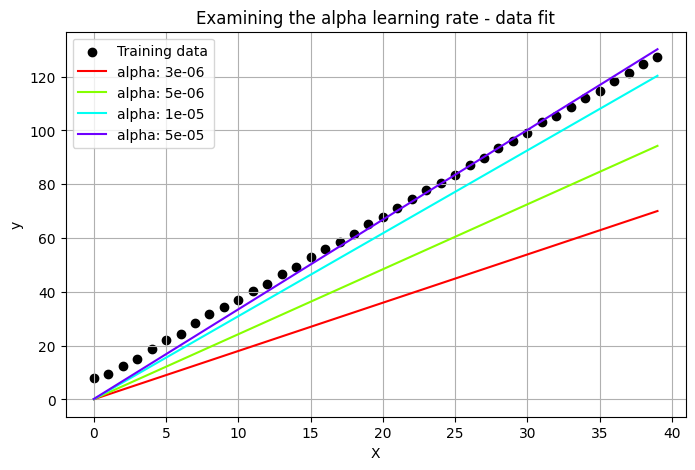

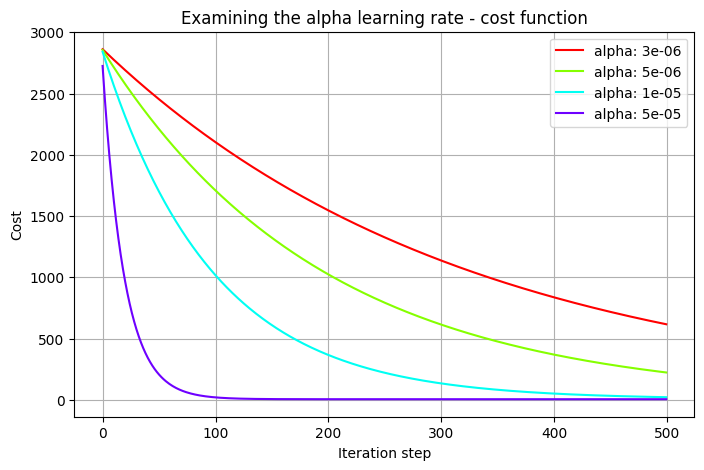

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import linear_regression_singlevar as lnrgsv
def get_cmap(n, name='hsv'):
    return plt.get_cmap(name, n)

rates = [3e-06,5e-06,10e-06,5e-05]
cmap = get_cmap(len(rates)+1)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='black', label='Training data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Examining the alpha learning rate - data fit')

for i, val in enumerate(rates):
    w,b,stepsW,stepsB,computed_costs=lnrgsv.run_gradient_descent(x,y,0,0,val,500)
    plt.plot(x, w*x+b,color=cmap(i),label=str('alpha: '+str(val)))

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.xlabel('Iteration step')
plt.ylabel('Cost')
plt.title('Examining the alpha learning rate - cost function')

for i, val in enumerate(rates):
    w,b,stepsW,stepsB,computed_costs=lnrgsv.run_gradient_descent(x,y,0,0,val,500)
    plt.plot(np.arange(len(computed_costs)), computed_costs,color=cmap(i),label=str('alpha: '+str(val)))

plt.legend()
plt.grid(True)
plt.show()


#### Feature scaling (normalization)

The main problem which is aimed by the normalization is the overscaling of certain (big) variables in contrast to smaller ones which results in the increased cost function

COnclusion: normalization allows to increase the learning rate and to quickly obtain optimal parameters w and b 

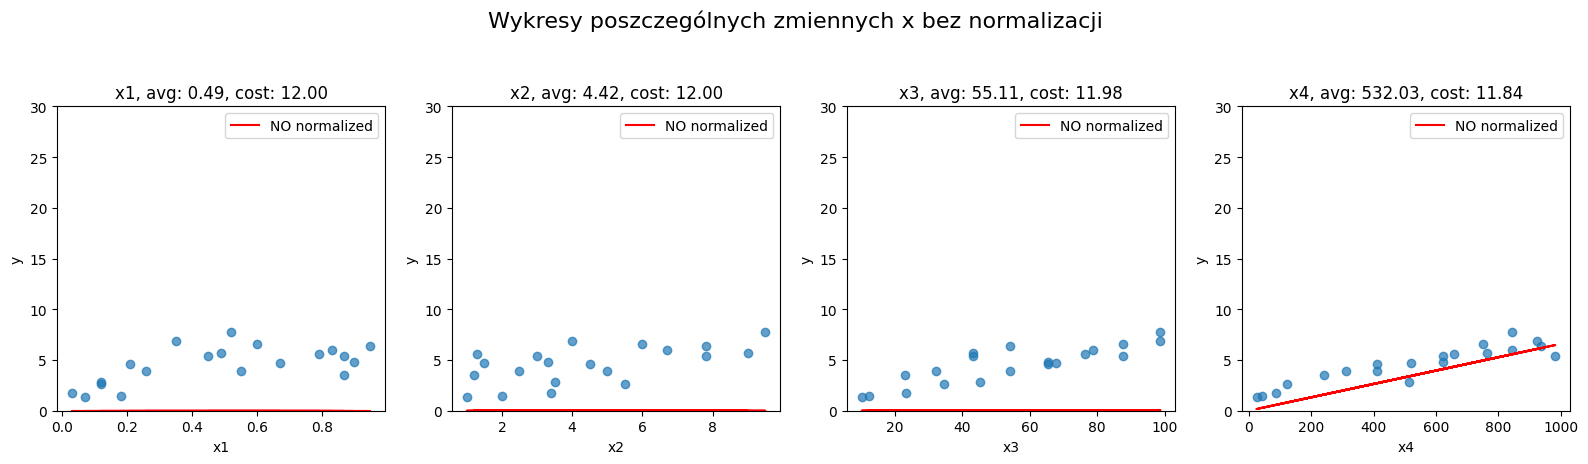

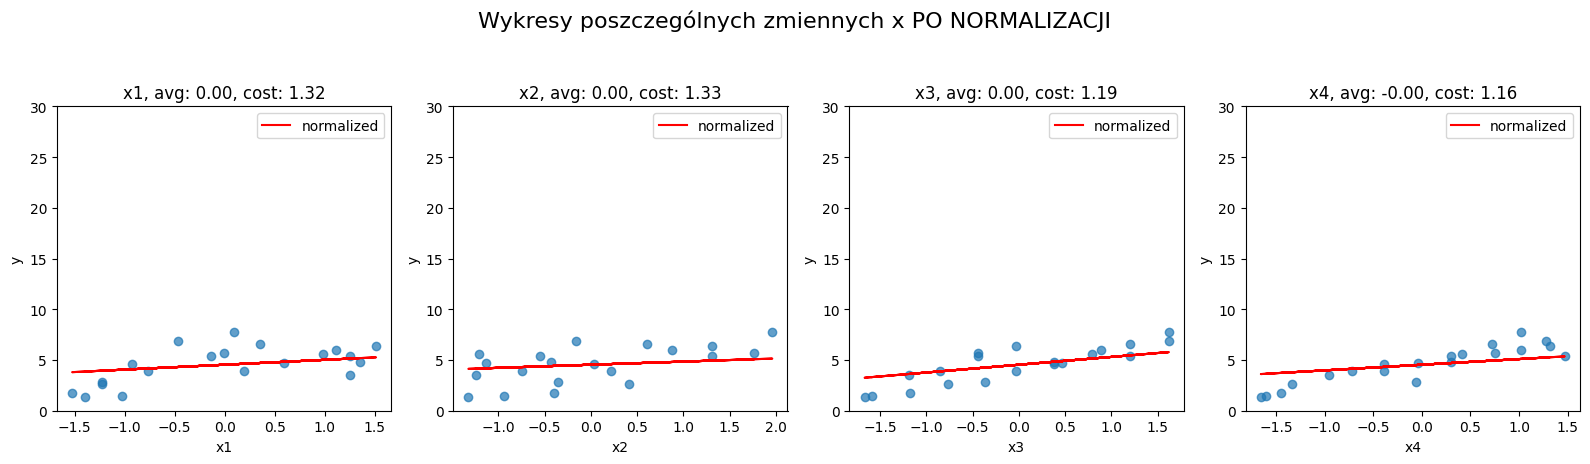

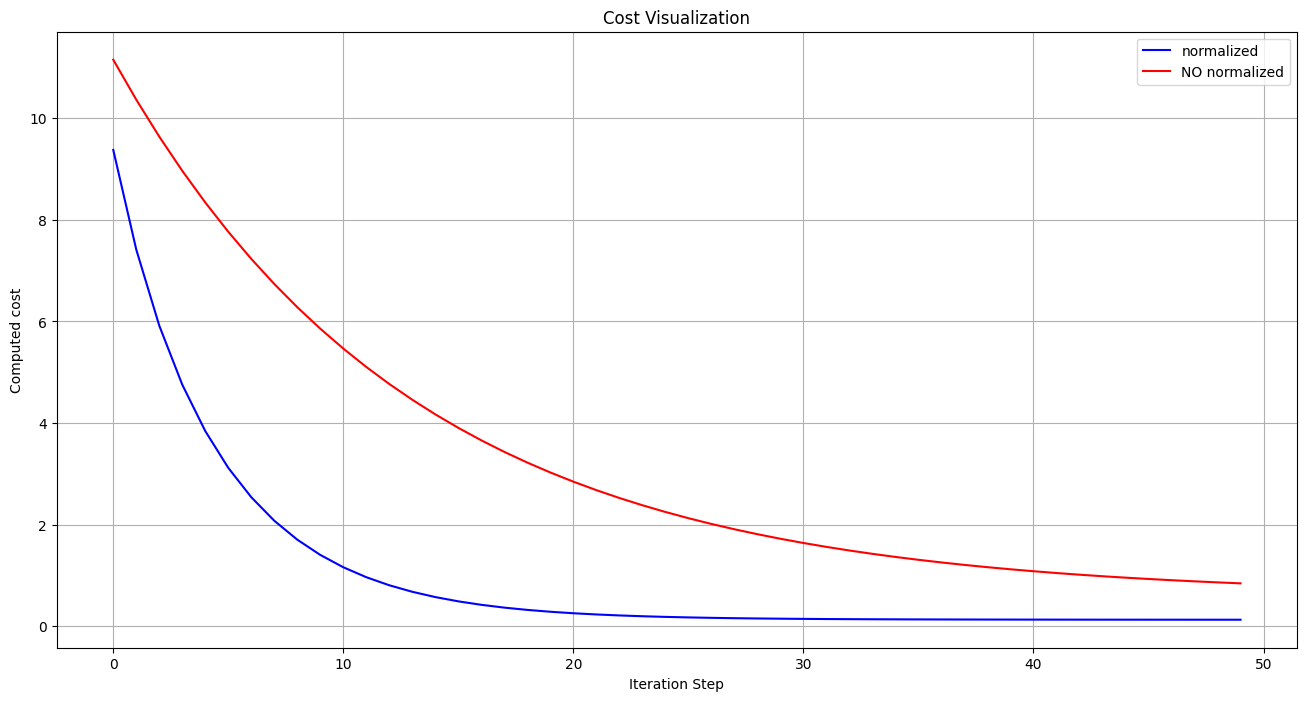

In [7]:
file_path = "../data/linear_regression_multivar.json"
with open(file_path, "r") as f:
    data = json.load(f)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
features = ["x1", "x2", "x3", "x4"]
df = pd.DataFrame(data)

w,b,stepsW,stepsB,computed_costs_nonrm=lnrgmv.run_gradient_descent(df[["x1", "x2", "x3", "x4"]].values,df["y_reg"],0,0,0.0000001,50)

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df["y_reg"], alpha=0.7)
    axes[i].plot(df[feature], w[i]*df[feature]+b,color='red',label='NO normalized')
    cost = lnrgmv.compute_cost(w[1],df["y_reg"],df[feature],b)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("y")
    avg_feature = df[feature].mean()
    axes[i].legend()
    axes[i].set_ylim(0,30)
    axes[i].set_title(f"{feature}, avg: {avg_feature:.2f}, cost: {cost:.2f}")

plt.tight_layout()
plt.suptitle("Wykresy poszczególnych zmiennych x bez normalizacji", fontsize=16, y=1.15)
plt.show()

######### NORMALIZATION #########
mu =np.mean(df[["x1", "x2", "x3", "x4"]].values,axis=0)
sigma  = np.std(df[["x1", "x2", "x3", "x4"]].values,axis=0)
df[["x1", "x2", "x3", "x4"]] = (df[["x1", "x2", "x3", "x4"]].values - mu)/sigma

w,b,stepsW_nonrm,stepsB,computed_costs_nrm=lnrgmv.run_gradient_descent(df[["x1", "x2", "x3", "x4"]].values,df["y_reg"],0,0,0.1,50)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df["y_reg"], alpha=0.7)
    axes[i].plot(df[feature], w[i]*df[feature]+b,color='red',label='normalized')
    cost = lnrgmv.compute_cost(w[1],df["y_reg"],df[feature],b)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("y")
    avg_feature = df[feature].mean()
    axes[i].legend()
    axes[i].set_ylim(0,30)
    axes[i].set_title(f"{feature}, avg: {avg_feature:.2f}, cost: {cost:.2f}")

plt.tight_layout()
plt.suptitle("Wykresy poszczególnych zmiennych x PO NORMALIZACJI", fontsize=16, y=1.15)
plt.show()

# Computed costs vs the iteration
plt.figure(figsize=(16,8))
plt.title('Cost Visualization')
plt.xlabel('Iteration Step')
plt.ylabel('Computed cost')
plt.plot(np.arange(len(computed_costs_nrm)), computed_costs_nrm, color='blue', label='normalized')
plt.plot(np.arange(len(computed_costs_nonrm)), computed_costs_nonrm, color='red', label='NO normalized')
plt.legend()
plt.grid(True)
plt.show()